**Salary Data Linear Regression**

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as  smf
import warnings
warnings.filterwarnings('ignore')

In [37]:
# Read the data & first five records
salary=pd.read_csv('Salary_Data.csv')
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [38]:
# Description about data
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [39]:
# Data cleaning and preprocessing
salary.shape

(30, 2)

In [40]:
salary.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [41]:
salary.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [42]:
# checking missing values
salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [43]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [44]:
# Finding correlationship between salary and yearsexperience

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

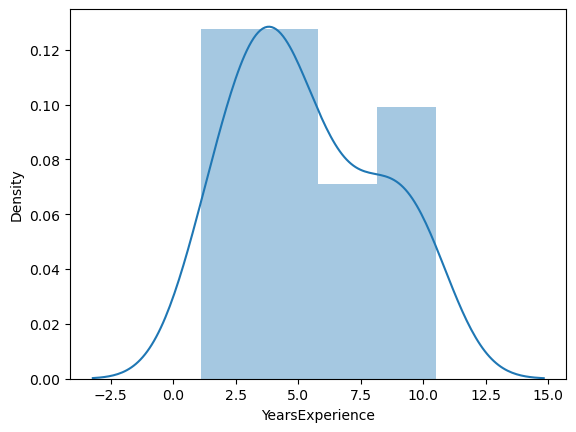

In [45]:
sns.distplot(salary['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

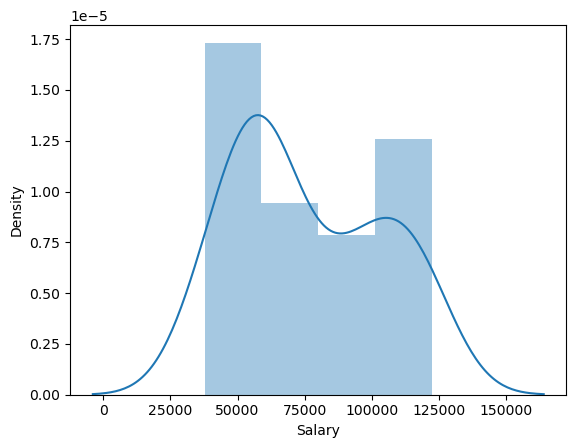

In [46]:
sns.distplot(salary['Salary'])

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

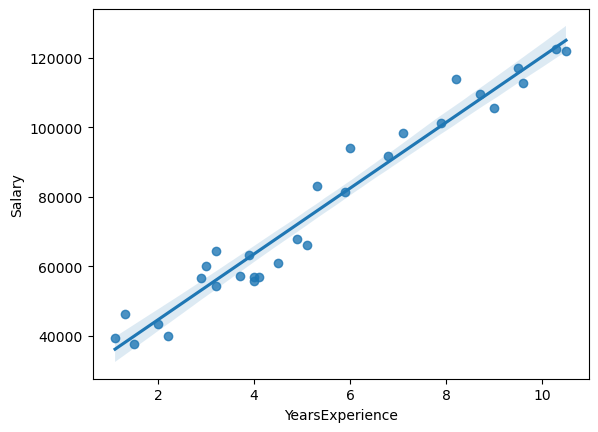

In [47]:
sns.regplot(x=salary['YearsExperience'],y=salary['Salary'])

In [48]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [49]:
# model creation with OLS
model=smf.ols("Salary~YearsExperience",data=salary).fit()

In [50]:
model

In [51]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [52]:
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [53]:
model.rsquared,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [54]:
#predict salary for 10 years experience
salary_10=(25792.200199) + (9449.962321)*(10)
salary_10

120291.823409

In [55]:
#automatic prediction
new_salary=pd.Series([10,12,15,18,20,25])
new_salary

0    10
1    12
2    15
3    18
4    20
5    25
dtype: int64

In [56]:
salary_predict=pd.DataFrame(new_salary,columns=["YearsExperience"])
salary_predict

,YearsExperience
0,10
1,12
2,15
3,18
4,20
5,25


In [57]:
model.predict(salary_predict)

0    120291.823413
1    139191.748056
2    167541.635020
3    195891.521985
4    214791.446628
5    262041.258235
dtype: float64

### Transformations

In [58]:
#log
rkd=np.log10(salary['YearsExperience'])
rkd1=np.log10(salary['Salary'])
rkn=pd.DataFrame(data=(rkd,rkd1))
rkn

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
YearsExperience,0.041393,0.113943,0.176091,0.301030,0.342423,0.462398,0.477121,0.505150,0.505150,0.568202,...,0.832509,0.851258,0.897627,0.913814,0.939519,0.954243,0.977724,0.982271,1.012837,1.021189
Salary,4.594867,4.664689,4.576698,4.638739,4.600875,4.753139,4.779236,4.735958,4.809189,4.757313,...,4.962549,4.992434,5.005618,5.056188,5.039140,5.023590,5.068071,5.051673,5.087749,5.085904


In [59]:
skn=rkn.transpose()
skn.head(5)

,YearsExperience,Salary
0,0.041393,4.594867
1,0.113943,4.664689
2,0.176091,4.576698
3,0.301030,4.638739
4,0.342423,4.600875


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

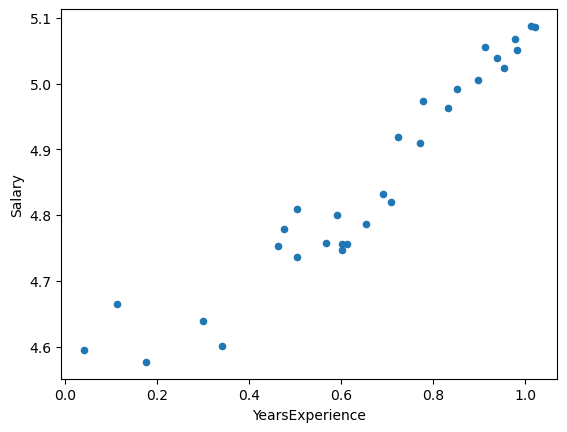

In [60]:
skn.plot.scatter(x='YearsExperience',y='Salary')

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

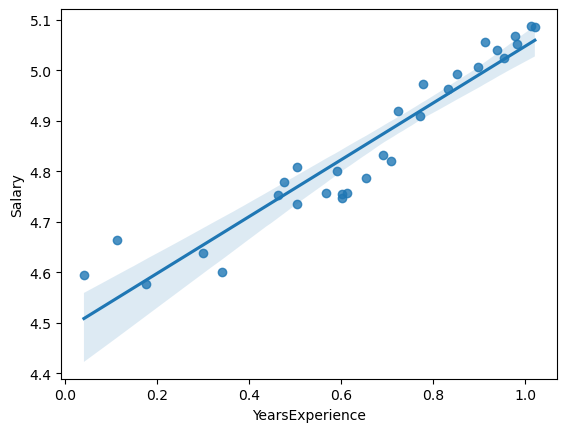

In [61]:
sns.regplot(x='YearsExperience',y='Salary',data=skn)

In [62]:
#Sqrt
sqtdata1=np.sqrt(salary['YearsExperience'])
sqtdata2=np.sqrt(salary['Salary'])
sqtdata3=pd.DataFrame(data=(sqtdata1,sqtdata2))
sqtdata3

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
YearsExperience,1.048809,1.140175,1.224745,1.414214,1.483240,1.702939,1.732051,1.788854,1.788854,1.923538,...,2.607681,2.664583,2.810694,2.863564,2.949576,3.000000,3.082207,3.098387,3.209361,3.240370
Salary,198.350700,214.953483,194.244691,208.626460,199.727314,237.995798,245.254969,233.334524,253.860198,239.142217,...,302.882816,313.485247,318.279751,337.360341,330.803567,324.933839,342.007310,335.611382,349.844251,349.101704


In [63]:
sqrtdata=sqtdata3.transpose()
sqrtdata.head(3)

,YearsExperience,Salary
0,1.048809,198.350700
1,1.140175,214.953483
2,1.224745,194.244691


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

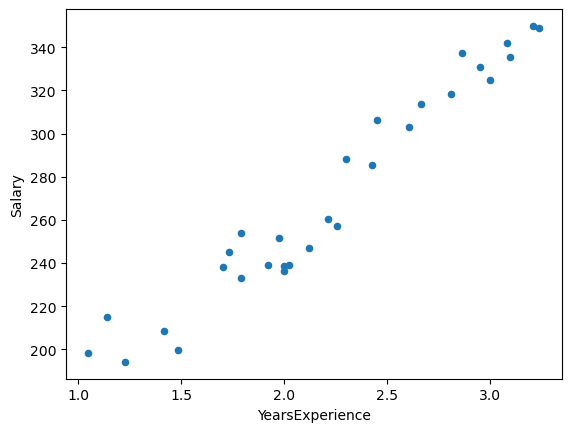

In [64]:
sqrtdata.plot.scatter(x="YearsExperience",y="Salary")

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

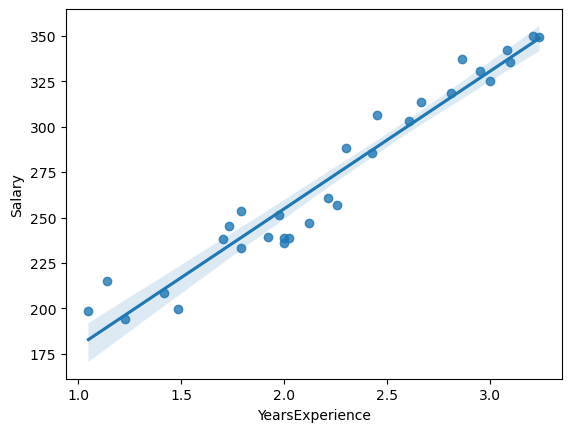

In [65]:
sns.regplot(x="YearsExperience",y="Salary",data=sqrtdata)

In [69]:
#exp
dataexp1=np.exp(salary['YearsExperience'])
dataexp2=(salary['Salary'])
dataexp3=pd.DataFrame(data=(dataexp1,dataexp2))
dataexp3.head(5)
dataexp3=dataexp3.transpose()

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

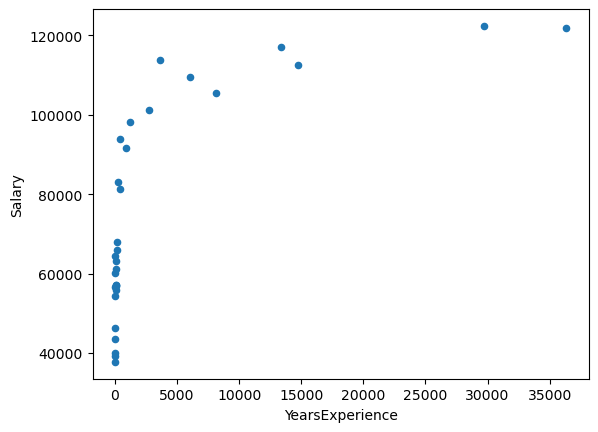

In [70]:
dataexp3.plot.scatter(x="YearsExperience",y="Salary")

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

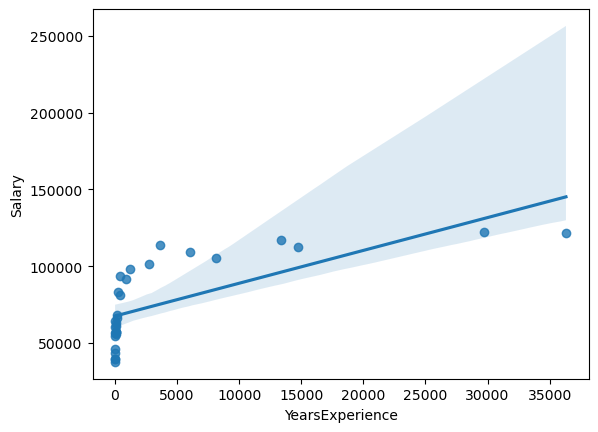

In [71]:
sns.regplot(x="YearsExperience",y="Salary",data=dataexp3)

In [75]:
ddiv1=1/(salary['YearsExperience'])
ddiv2=1/(salary['Salary'])
ddiv3=pd.DataFrame(data=(ddiv1,ddiv2))

In [76]:
ddiv3=ddiv3.transpose()
ddiv3.head()

,YearsExperience,Salary
0,0.909091,0.000025
1,0.769231,0.000022
2,0.666667,0.000027
3,0.500000,0.000023
4,0.454545,0.000025


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

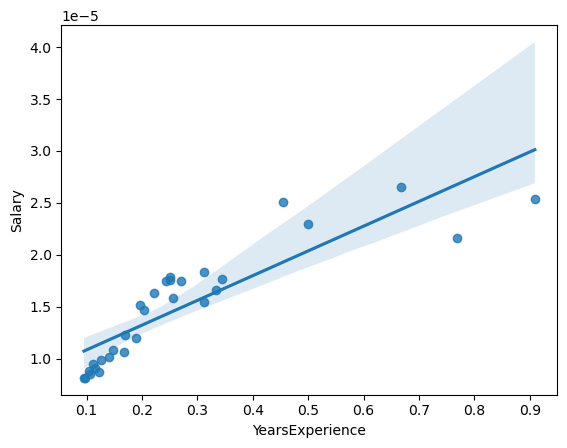

In [77]:
sns.regplot(x='YearsExperience',y='Salary',data=ddiv3)

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

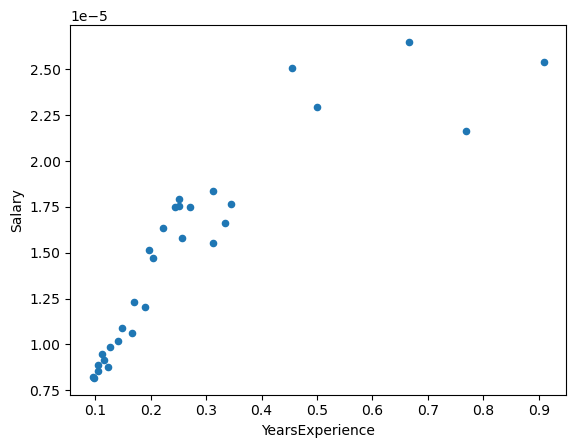

In [78]:
ddiv3.plot.scatter(x='YearsExperience',y='Salary')

**Delivery Time Data Linear regression**

In [35]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [36]:
# Read the data
delivery=pd.read_csv('delivery_time.csv')
delivery

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [37]:
# renaming the data columns
delivery=delivery.rename({'Delivery Time':'DT','Sorting Time':'ST'},axis=1)

In [38]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DT      21 non-null     float64
 1   ST      21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [39]:
delivery.describe()

,DT,ST
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


C:\Users\POONAM PATIL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DT', ylabel='Density'>

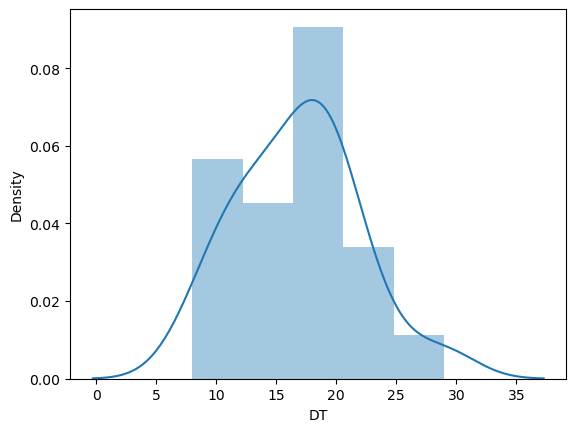

In [40]:
# Data distribution
sns.distplot(delivery['DT'])

C:\Users\POONAM PATIL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ST', ylabel='Density'>

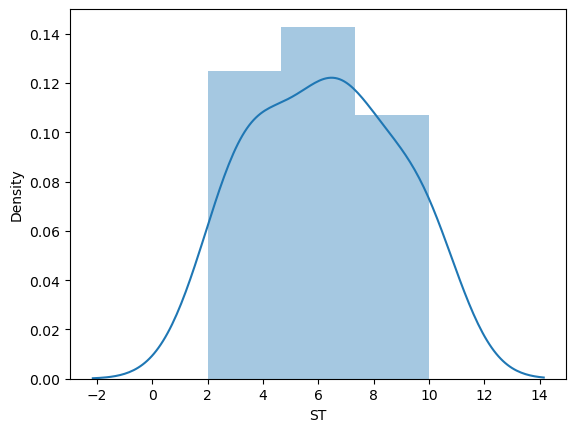

In [41]:
sns.distplot(delivery['ST'])

In [42]:
#Correlation analysis
delivery.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


<AxesSubplot:xlabel='ST', ylabel='DT'>

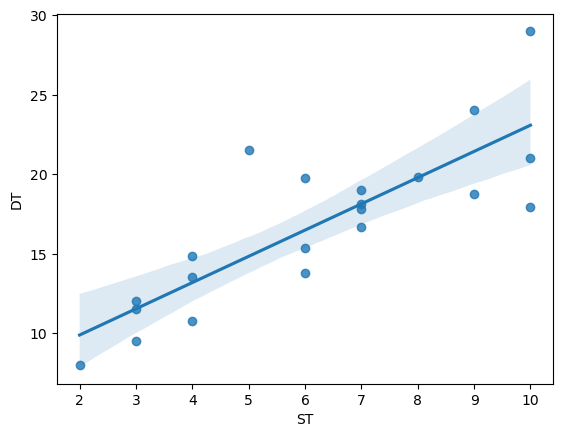

In [43]:
sns.regplot(x=delivery['ST'],y=delivery['DT'])

In [44]:
# model creation
model_delivery=smf.ols("DT~ST",data=delivery).fit()

In [45]:
model_delivery.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [46]:
#Print values for t value and p value
print(f"t value is\n{model_delivery.tvalues}\nP value is\n{model_delivery.pvalues}")

t value is
Intercept    3.823349
ST           6.387447
dtype: float64
P value is
Intercept    0.001147
ST           0.000004
dtype: float64


In [47]:
model_delivery.summary

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x0000013616E9B340>>

In [48]:
new_delivery=pd.Series([15,20,25,40,45,60])
new_delivery

0    15
1    20
2    25
3    40
4    45
5    60
dtype: int64

In [49]:
predict_delivery=pd.DataFrame(new_delivery,columns=['sorting_time'])
predict_delivery

,sorting_time
0,15
1,20
2,25
3,40
4,45
5,60


## Transformations

In [51]:
#Log Transformations
log1=np.log(delivery['DT'])
log2=np.log(delivery['ST'])
log3=pd.DataFrame(data=(log1,log2))

In [52]:
log3=log3.transpose()

In [54]:
log3

,DT,ST
0,3.044522,2.302585
1,2.602690,1.386294
2,2.983153,1.791759
3,3.178054,2.197225
4,3.367296,2.302585
5,2.731115,1.791759
6,2.944439,1.945910
7,2.251292,1.098612
8,2.884801,2.302585
9,2.931194,2.197225


<AxesSubplot:xlabel='ST', ylabel='DT'>

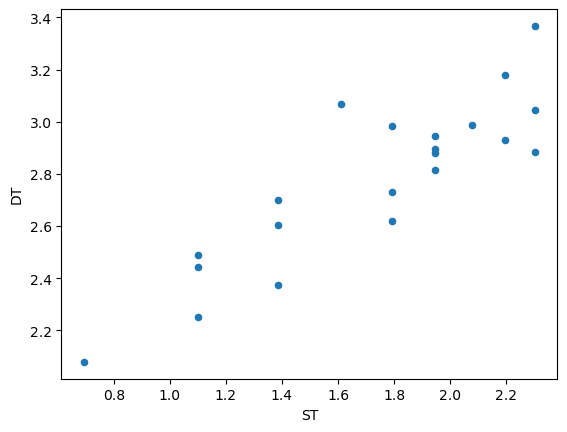

In [55]:
log3.plot.scatter(x="ST",y='DT')

<AxesSubplot:xlabel='ST', ylabel='DT'>

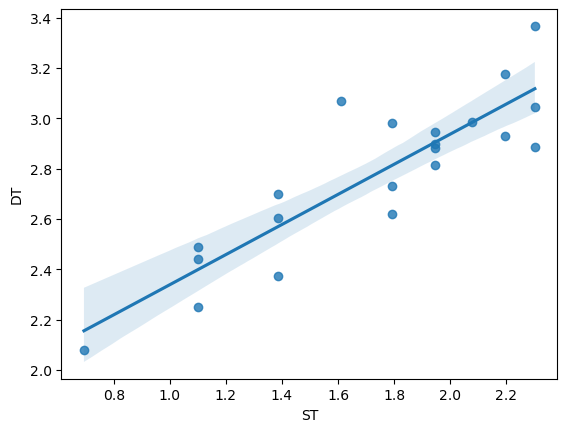

In [56]:
sns.regplot(x='ST',y='DT',data=log3)

In [64]:
# Square root transformation
sqt1=np.log(delivery['DT'])
sqt2=np.log(delivery['ST'])
sqt3=pd.DataFrame(data=(sqt1,sqt2))

In [65]:
sqt3=sqt3.transpose()
sqt3.head(5)

,DT,ST
0,3.044522,2.302585
1,2.602690,1.386294
2,2.983153,1.791759
3,3.178054,2.197225
4,3.367296,2.302585


<AxesSubplot:xlabel='ST', ylabel='DT'>

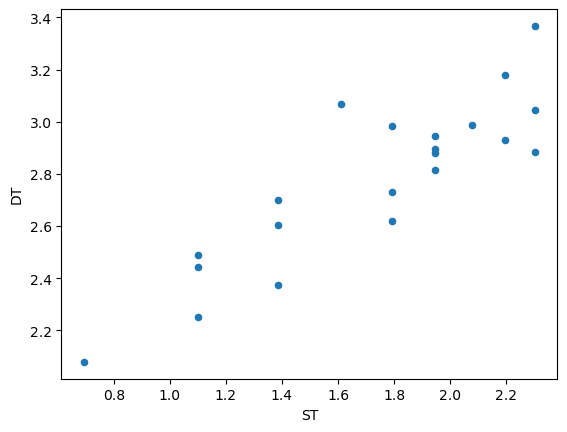

In [66]:
sqt3.plot.scatter(x='ST',y='DT')

<AxesSubplot:xlabel='ST', ylabel='DT'>

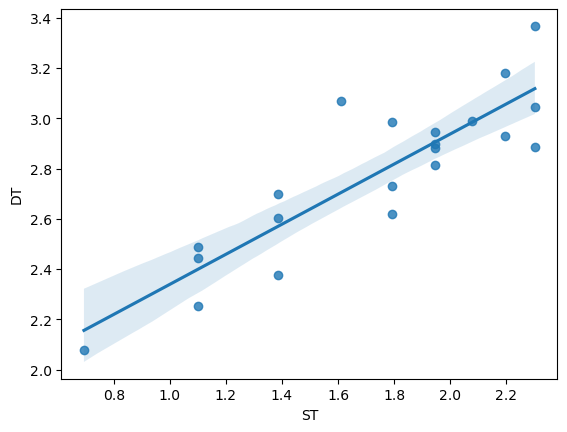

In [67]:
sns.regplot(x='ST',y='DT',data=sqt3)

In [69]:
# Data exp transformation
exp1=np.log(delivery['DT'])
exp2=np.log(delivery['ST'])
exp3=pd.DataFrame(data=(exp1,exp2))

In [70]:
exp3=exp3.transpose()
exp3.head(5)

,DT,ST
0,3.044522,2.302585
1,2.602690,1.386294
2,2.983153,1.791759
3,3.178054,2.197225
4,3.367296,2.302585


<AxesSubplot:xlabel='ST', ylabel='DT'>

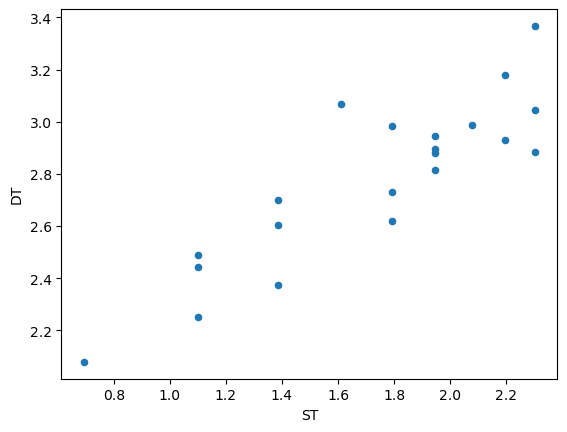

In [71]:
exp3.plot.scatter(x="ST",y='DT')

<AxesSubplot:xlabel='ST', ylabel='DT'>

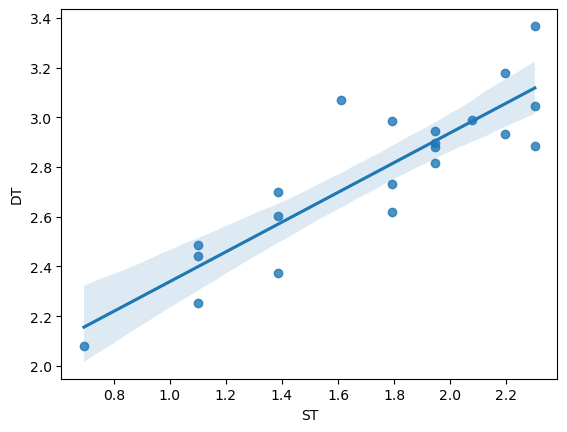

In [72]:
sns.regplot(x='ST',y="DT",data=exp3)

In [73]:
# Div transformation
div1=1/(delivery['DT'])
div2=1/(delivery['ST'])
div3 = pd.DataFrame(data=(div1,div2))
div3=div3.transpose()

In [74]:
div3.head()

,DT,ST
0,0.047619,0.100000
1,0.074074,0.250000
2,0.050633,0.166667
3,0.041667,0.111111
4,0.034483,0.100000


<AxesSubplot:xlabel='ST', ylabel='DT'>

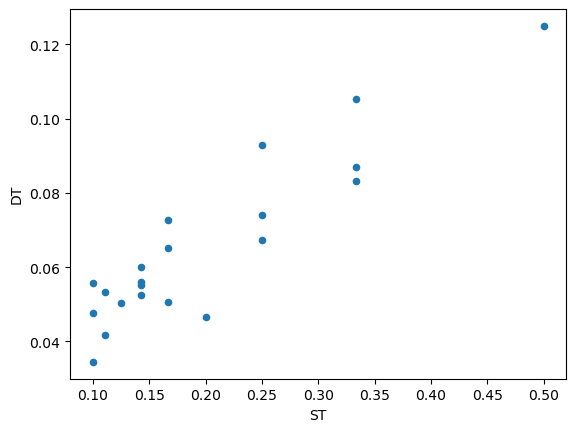

In [75]:
div3.plot.scatter(x='ST',y="DT")

<AxesSubplot:xlabel='ST', ylabel='DT'>

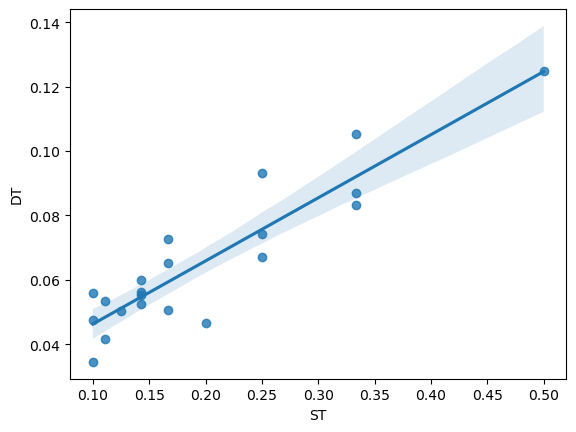

In [76]:
sns.regplot(x='ST',y='DT',data=div3)